### EDA STEP 1: UNDERSTANDING THE PROBLEM AND HYPOTESİS

#### We have 2 different datas: fighter stat and fight datas. Moreover, so many people think that physical features like reach, height or age can be tremendously important for winning a fight. Therefore, my goal is trying to prove that reach, height and age really important for winning an ufc fight so you can think that my hypotesis is that physical attributes like reach, height and age are really important for winning or losing a ufc fight.

### Importing Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### creating dataframes

In [174]:
fighters_df = pd.read_csv("../datasets/fighter_stats.csv") # fighter stats csv to dataframe
fights_df = pd.read_csv("../datasets/raw_fights.csv") # fight datas csv to dataframe

###### it is good to be sure that we get datas correctly color 

In [175]:
fighters_df.head(5)

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


In [176]:
fights_df.head(5)

,Fight_Id,Win/No Contest/Draw,Fighter_1,Fighter_2,KD_1,KD_2,STR_1,STR_2,TD_1,TD_2,SUB_1,SUB_2,Weight_Class,Method,Round,Fight_Time,Event_Id
0,d61373d9fdf01a12,win,Brendan Allen,Reinier de Ridder,0,0,22,9,1,3,1,1,Middleweight,KO/TKO,4,5:00,38e5d9dcb0fddc42
1,cdd565a16975c711,win,Mike Malott,Kevin Holland,0,0,49,52,1,1,1,0,Welterweight,U-DEC,3,5:00,38e5d9dcb0fddc42
2,857d274e47aa8c4e,win,Aiemann Zahabi,Marlon Vera,0,1,81,56,0,0,0,0,Bantamweight,S-DEC,3,5:00,38e5d9dcb0fddc42
3,c82acd7b17915591,win,Manon Fiorot,Jasmine Jasudavicius,0,0,16,2,0,0,0,0,Women's Flyweight,KO/TKO Punches,1,1:14,38e5d9dcb0fddc42
4,a18edcb638ba7e39,win,Charles Jourdain,Davey Grant,1,0,25,9,0,0,1,0,Bantamweight,SUB Guillotine Choke,1,3:05,38e5d9dcb0fddc42


In [177]:
fights_df.shape

(8402, 17)

##### Now we can start to analyze our data. Let's start with fights_df

###### There are 17 columns and 8402 rows. 
###### Let's explanining columns. 
###### Fight_Id: id of the match.
###### Win/No Contest/Draw: how the match ended
###### Fighter_1: first fighter
###### Fİghther_2: second fighter
###### KD_1: Number of knockdowns landed by first fighter
###### KD_2: Number of knockdowns landed by second fighter
###### STR_1: Number of Significant Strikes landed by the first fighter
###### STR_2: Number of Significant Strikes landed by the first fighter
###### TD_1: Takedowns landed by the first fighter
###### TD_2: Takedowns landed by the second fighter
###### SUB_1: Number of submission attempts by first fighter 
###### SUB_2: Number of submission attempts by second fighter
###### Weight_Class: The weight division of the fight
###### Method: How the fight ended (TKO, KO, Decision...)
###### Round: The round which the fight ended
###### Fight_Time: Time elapsed when the fight concluded
###### Event_Id: Id of the event which fight happend


In [178]:
fights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8402 entries, 0 to 8401
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fight_Id             8402 non-null   object
 1   Win/No Contest/Draw  8402 non-null   object
 2   Fighter_1            8402 non-null   object
 3   Fighter_2            8402 non-null   object
 4   KD_1                 8402 non-null   object
 5   KD_2                 8402 non-null   object
 6   STR_1                8402 non-null   object
 7   STR_2                8402 non-null   object
 8   TD_1                 8402 non-null   object
 9   TD_2                 8402 non-null   object
 10  SUB_1                8402 non-null   object
 11  SUB_2                8402 non-null   object
 12  Weight_Class         8402 non-null   object
 13  Method               8402 non-null   object
 14  Round                8402 non-null   int64 
 15  Fight_Time           8402 non-null   object
 16  Event_

##### Since some columns which has to be integer (like STR_1 STR_2 etc.) are object I have to change their dtype to numeric values so that I can analyze them in an easier way.

In [179]:
fights_df.dtypes

Fight_Id               object
Win/No Contest/Draw    object
Fighter_1              object
Fighter_2              object
KD_1                   object
KD_2                   object
STR_1                  object
STR_2                  object
TD_1                   object
TD_2                   object
SUB_1                  object
SUB_2                  object
Weight_Class           object
Method                 object
Round                   int64
Fight_Time             object
Event_Id               object
dtype: object

In [180]:
fights_df["Fight_Time"] = fights_df["Fight_Time"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1])) # thx to this we can turn object type to integer and change minute:second to seconds
integer_columns = ["KD_1", "KD_2", "STR_1", "STR_2", "TD_1", "TD_2", "SUB_1", "SUB_2"]
fights_df[integer_columns] = fights_df[integer_columns].apply(pd.to_numeric, errors="coerce")

In [181]:
fights_df["Fight_Time"]

0       300
1       300
2       300
3        74
4       185
       ... 
8397    170
8398    292
8399    733
8400     58
8401     20
Name: Fight_Time, Length: 8402, dtype: int64

In [182]:
fights_df.dtypes

Fight_Id                object
Win/No Contest/Draw     object
Fighter_1               object
Fighter_2               object
KD_1                   float64
KD_2                   float64
STR_1                  float64
STR_2                  float64
TD_1                   float64
TD_2                   float64
SUB_1                  float64
SUB_2                  float64
Weight_Class            object
Method                  object
Round                    int64
Fight_Time               int64
Event_Id                object
dtype: object

In [183]:
fights_df.describe()

,KD_1,KD_2,STR_1,STR_2,TD_1,TD_2,SUB_1,SUB_2,Round,Fight_Time
count,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8402.000000,8402.000000
mean,0.365589,0.061449,44.269061,29.482997,1.449469,0.668536,0.516525,0.239709,2.353368,227.963699
std,0.605251,0.262482,35.002384,27.493859,1.988747,1.196913,0.919360,0.668899,1.017514,97.279050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
25%,0.000000,0.000000,18.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,151.000000
50%,0.000000,0.000000,37.000000,22.000000,1.000000,0.000000,0.000000,0.000000,3.000000,290.500000
75%,1.000000,0.000000,63.000000,43.000000,2.000000,1.000000,1.000000,0.000000,3.000000,300.000000
max,6.000000,3.000000,445.000000,271.000000,21.000000,11.000000,10.000000,7.000000,5.000000,1080.000000


###### by using nunique we can see the unique values for each features.

In [184]:
fights_df.nunique()

Fight_Id               8402
Win/No Contest/Draw       3
Fighter_1              1857
Fighter_2              2513
KD_1                      7
KD_2                      4
STR_1                   201
STR_2                   167
TD_1                     18
TD_2                     11
SUB_1                    11
SUB_2                     8
Weight_Class             15
Method                   71
Round                     5
Fight_Time              339
Event_Id                750
dtype: int64

##### Since dtypes are changed we can move to our other dataframe, fighters_df.

In [185]:
fighters_df.head(5)

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


In [186]:
fighters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2478 non-null   object 
 1   wins         2478 non-null   float64
 2   losses       2478 non-null   float64
 3   height       2478 non-null   float64
 4   weight       2478 non-null   float64
 5   reach        1823 non-null   float64
 6   stance       2401 non-null   object 
 7   age          2318 non-null   float64
 8   SLpM         2478 non-null   float64
 9   sig_str_acc  2478 non-null   float64
 10  SApM         2478 non-null   float64
 11  str_def      2478 non-null   float64
 12  td_avg       2478 non-null   float64
 13  td_acc       2478 non-null   float64
 14  td_def       2478 non-null   float64
 15  sub_avg      2478 non-null   float64
dtypes: float64(14), object(2)
memory usage: 310.0+ KB


In [187]:
fighters_df.describe()

,wins,losses,height,weight,reach,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
count,2478.000000,2478.000000,2478.000000,2478.000000,1823.000000,2318.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,14.399112,6.111380,178.384262,76.876852,182.035656,37.727783,2.932623,0.406029,3.388567,0.488910,1.393543,0.322571,0.494972,0.602179
std,9.853474,4.548011,8.851777,17.976646,10.654129,7.251188,1.736693,0.151297,2.027258,0.162305,1.512821,0.256928,0.297551,1.057863
min,0.000000,0.000000,152.400000,52.160000,147.320000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,172.720000,65.770000,175.260000,32.000000,1.810000,0.360000,2.320000,0.450000,0.120000,0.070000,0.300000,0.000000
50%,13.000000,5.000000,177.800000,77.110000,182.880000,37.000000,2.900000,0.430000,3.230000,0.520000,1.000000,0.330000,0.550000,0.300000
75%,18.000000,8.000000,185.420000,83.910000,190.500000,42.000000,3.920000,0.500000,4.290000,0.580000,2.065000,0.480000,0.710000,0.800000
max,253.000000,53.000000,210.820000,349.270000,213.360000,81.000000,23.330000,1.000000,42.000000,1.000000,13.950000,1.000000,1.000000,16.400000


In [188]:
fighters_df.shape

(2479, 16)

In [189]:
fighters_df.dtypes

name            object
wins           float64
losses         float64
height         float64
weight         float64
reach          float64
stance          object
age            float64
SLpM           float64
sig_str_acc    float64
SApM           float64
str_def        float64
td_avg         float64
td_acc         float64
td_def         float64
sub_avg        float64
dtype: object

###### by using nunique we can see the unique values for each features.

In [190]:
fighters_df.nunique()

name           2472
wins             54
losses           33
height           23
weight           80
reach            27
stance            5
age              47
SLpM            620
sig_str_acc      75
SApM            629
str_def          76
td_avg          486
td_acc           82
td_def           92
sub_avg          64
dtype: int64

##### Since this dtypes are float for columns; wins, losses, height weight reach etc. we do not need to turn this data types to
##### Let's analyze columns for fighters_df

###### There are 16 columns and 2479 rows
###### name: name of the fighter
###### wins: total wins of that fighter
###### losses: total losses of that fighter
###### height: height of that fighter
###### reach: reach of that fighter
###### stance: stance of that fighter (Orthodox: traditional left hand forward fighting stance and Southpaw: right hand forward fighting stance)
###### age: age of that fighter
###### SLpM: Significant strikes landed per minute by that fighter
###### sig_str_Acc: Significant Strikes Accuracy (ratio of landed to attempted strikes)
###### SApM: Significant Strikes Absorbed per minute by that fighter
###### str_def: Strike Defence ratio (ratio of strikes successfully avoided)
###### td_avg: Takedowns landed by match
###### td_acc: Takedowns accuracy

#### Now let's handle the Missing Values.

##### First let's check that how much missing values are there for each features
###### Starting with fights_df

In [191]:
fights_df.isnull().sum()

Fight_Id                0
Win/No Contest/Draw     0
Fighter_1               0
Fighter_2               0
KD_1                   21
KD_2                   21
STR_1                  21
STR_2                  21
TD_1                   21
TD_2                   21
SUB_1                  21
SUB_2                  21
Weight_Class            0
Method                  0
Round                   0
Fight_Time              0
Event_Id                0
dtype: int64

###### There are some missing values in KD_1 KD_2 STR_1 STR_2 etc. I wanted to see the rows that includes any Null

In [192]:
fights_df[fights_df.isnull().any(axis=1)]

,Fight_Id,Win/No Contest/Draw,Fighter_1,Fighter_2,KD_1,KD_2,STR_1,STR_2,TD_1,TD_2,SUB_1,SUB_2,Weight_Class,Method,Round,Fight_Time,Event_Id
8229,635fbf57001897c7,win,Cesar Marscucci,Paulo Santos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lightweight,KO/TKO,1,627,32a3025d5db456ae
8237,8b258bbb37f74a66,win,Andre Roberts,Harry Moskowitz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavyweight,U-DEC,2,180,4a01dc8376736ef5
8245,4bce0ce561a65288,win,Chris Brennan,Courtney Turner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lightweight,SUB Armbar,1,80,749685d24e2cac50
8246,b80872821bc4f6ba,win,Laverne Clark,Josh Stuart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lightweight,KO/TKO,1,75,749685d24e2cac50
8286,77bf1e37929b0d59,win,Justin Martin,Eric Martin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavyweight,SUB Heel Hook,1,14,96eff1a628adcc7f
8287,565ecefd8a37ad7e,win,Nick Sanzo,Jackie Lee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lightweight,KO/TKO,1,48,96eff1a628adcc7f
8295,2f449bd58b3d9a99,win,Tai Bowden,Jack Nilson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open Weight,KO/TKO Headbutts,1,286,9b5b5a75523728f3
8296,d93c8c77e1091a16,win,Steve Nelmark,Marcus Bossett,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open Weight,SUB Shoulder Choke,1,97,9b5b5a75523728f3
8297,a5c90086fb65f58e,win,Mark Hall,Felix Lee Mitchell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open Weight,KO/TKO,1,105,9b5b5a75523728f3
8304,3badedeb2c5533f4,win,Roberto Traven,Dave Berry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open Weight,KO/TKO Punches,1,93,6ceff86fae4f6b3b


###### Since These 21 matchs (you can directly count them or you can use fights_df.isnull().sum() for counting) has None values 8 columns
###### And since we have enough data I do not want to fill these columns with mean or mid values. So I will directly drop this columns

In [193]:
fights_df = fights_df.dropna(axis=0, how="any") # drop Null values
fights_df.isnull().sum() # we can see that there is no null values anymore

Fight_Id               0
Win/No Contest/Draw    0
Fighter_1              0
Fighter_2              0
KD_1                   0
KD_2                   0
STR_1                  0
STR_2                  0
TD_1                   0
TD_2                   0
SUB_1                  0
SUB_2                  0
Weight_Class           0
Method                 0
Round                  0
Fight_Time             0
Event_Id               0
dtype: int64

#### Okay since we handled with the null values in the fights_df, we can move to fighters_df

###### Let's see the count of the rows that include null value(s)

In [194]:
fighters_df.isnull().sum()

name             1
wins             1
losses           1
height           1
weight           1
reach          656
stance          78
age            161
SLpM             1
sig_str_acc      1
SApM             1
str_def          1
td_avg           1
td_acc           1
td_def           1
sub_avg          1
dtype: int64

###### We can see that there are too many null values. But most of them in the reach feature but since we want to see any correlation between
###### pyhsical attributes and winning-losing I do not really want to fill this features with mid or mean values.
###### Let's see some of the rows that are include null values.

In [195]:
fighters_df[fighters_df.isnull().any(axis=1)]

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
21,Daria Zhelezniakova,9.0,1.0,175.26,61.23,172.72,NaN,28.0,3.80,0.38,1.67,0.82,0.00,0.00,0.50,0.0
1101,Jesus Pinedo,16.0,5.0,177.80,70.31,NaN,Southpaw,27.0,3.23,0.38,4.37,0.52,2.50,1.00,1.00,0.0
1131,Michel Batista,4.0,1.0,190.50,117.93,NaN,Orthodox,39.0,0.00,0.00,4.03,0.40,6.72,0.50,0.00,0.0
1166,Kalindra Faria,18.0,8.0,170.18,56.70,NaN,Switch,37.0,2.23,0.56,1.44,0.45,1.31,0.66,0.20,0.7
1182,Jay Cucciniello,8.0,1.0,170.18,70.31,NaN,Orthodox,37.0,0.93,0.21,4.73,0.36,0.00,0.00,0.71,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,Thaddeus Luster,0.0,1.0,190.50,95.25,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2475,David Levicki,1.0,3.0,195.58,124.74,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2476,Ray Wizard,0.0,1.0,187.96,102.06,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2477,Sean Daugherty,0.0,2.0,182.88,79.38,NaN,NaN,48.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


##### Since there are too many Null data in reach and reach one of the most important attributes for our dataset, I want to fill it with linear regression.
##### I will use linear regression because height and reach is generally proportional.

In [196]:
from sklearn.linear_model import LinearRegression

train_df = fighters_df["height"].notna() & fighters_df["reach"].notna() # we will get df that has height and reach data
x_train = fighters_df.loc[train_df, ["height"]] # get height column
y_train = fighters_df.loc[train_df, "reach"] # get reach column 
# it is a basic regression. linear regression is simply y = a*x + b
# if you have done some project (which I have done (you can check it from my github page though)) u can do this easily

lr = LinearRegression()
lr.fit(X=x_train, y=y_train) # started learning

pred_df = fighters_df["height"].notna() & fighters_df["reach"].isnull()
x_pred = fighters_df.loc[pred_df, ["height"]]

fighters_df.loc[pred_df, "reach"] = lr.predict(x_pred)

# let's look at the null values
fighters_df.isnull().sum()




name             1
wins             1
losses           1
height           1
weight           1
reach            1
stance          78
age            161
SLpM             1
sig_str_acc      1
SApM             1
str_def          1
td_avg           1
td_acc           1
td_def           1
sub_avg          1
dtype: int64

##### Now there is only left age and stance. Actually stance can be filled with "orthodox" since most of the fighters uses Orthodox stance.

In [197]:
fighters_df.loc[fighters_df["stance"].isnull(), "stance"] = "Orthodox"

##### And lastly we have to drop rows which do not have age values because simply I do not want to make assumption about age since we do not have enough information.

In [198]:
fighters_df = fighters_df.dropna(subset=["age"])

In [199]:
fighters_df.isnull().sum()

name           0
wins           0
losses         0
height         0
weight         0
reach          0
stance         0
age            0
SLpM           0
sig_str_acc    0
SApM           0
str_def        0
td_avg         0
td_acc         0
td_def         0
sub_avg        0
dtype: int64

#### And we successfully managed with null rows.

### Let's continue with data merging Since we have 2 datasets.

In [200]:
f1_stats = fighters_df.add_prefix("f1_") # adding prefix f1_ to column names
f1_stats = f1_stats.rename(columns={"f1_name": "join_name"}) # name column turn to join name

f1_stats.head(3)

,join_name,f1_wins,f1_losses,f1_height,f1_weight,f1_reach,f1_stance,f1_age,f1_SLpM,f1_sig_str_acc,f1_SApM,f1_str_def,f1_td_avg,f1_td_acc,f1_td_def,f1_sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2


In [201]:
f2_stats = fighters_df.add_prefix("f2_") # adding prefix f2_ to column names
f2_stats = f2_stats.rename(columns={"f2_name" : "join_name"}) # name column turn to join name

f2_stats.head(3)

,join_name,f2_wins,f2_losses,f2_height,f2_weight,f2_reach,f2_stance,f2_age,f2_SLpM,f2_sig_str_acc,f2_SApM,f2_str_def,f2_td_avg,f2_td_acc,f2_td_def,f2_sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2


In [202]:
 # now let's merge (basic sql merge)
df = fights_df.merge(f1_stats, left_on="Fighter_1", right_on="join_name", how="left")
df = df.merge(f2_stats, left_on="Fighter_2", right_on="join_name", how="left")
df = df.drop(columns=["join_name_x", "join_name_y"])
df.head(5)

,Fight_Id,Win/No Contest/Draw,Fighter_1,Fighter_2,KD_1,KD_2,STR_1,STR_2,TD_1,TD_2,...,f2_stance,f2_age,f2_SLpM,f2_sig_str_acc,f2_SApM,f2_str_def,f2_td_avg,f2_td_acc,f2_td_def,f2_sub_avg
0,d61373d9fdf01a12,win,Brendan Allen,Reinier de Ridder,0.0,0.0,22.0,9.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cdd565a16975c711,win,Mike Malott,Kevin Holland,0.0,0.0,49.0,52.0,1.0,1.0,...,Orthodox,31.0,4.24,0.49,3.19,0.50,0.85,0.38,0.54,0.6
2,857d274e47aa8c4e,win,Aiemann Zahabi,Marlon Vera,0.0,1.0,81.0,56.0,0.0,0.0,...,Switch,31.0,4.31,0.49,5.48,0.50,0.53,0.39,0.70,0.9
3,c82acd7b17915591,win,Manon Fiorot,Jasmine Jasudavicius,0.0,0.0,16.0,2.0,0.0,0.0,...,Orthodox,35.0,3.95,0.45,4.03,0.51,2.16,0.37,0.80,0.4
4,a18edcb638ba7e39,win,Charles Jourdain,Davey Grant,1.0,0.0,25.0,9.0,0.0,0.0,...,Orthodox,38.0,4.77,0.42,3.82,0.55,1.26,0.41,0.61,0.2


##### Now this is important let's add new columns which keep the diff values between f1 and f2 for height, reach, sig_str, td_def, win_rate etc.

In [203]:
df["reach_diff"] = df["f1_reach"] - df["f2_reach"]
df["age_diff"] = df["f1_age"] - df["f2_age"]
df["height_diff"] = df["f1_height"] - df["f2_height"]
df['sig_str_diff'] = df['f1_sig_str_acc'] - df['f2_sig_str_acc']
df['td_def_diff'] = df['f1_td_def'] - df['f2_td_def']
df['td_avg_diff'] = df['f1_td_avg'] - df['f2_td_avg']
df['f1_win_rate'] = df['f1_wins'] / (df['f1_wins'] + df['f1_losses'])
df['f2_win_rate'] = df['f2_wins'] / (df['f2_wins'] + df['f2_losses'])
df['win_rate_diff'] = df['f1_win_rate'] - df['f2_win_rate']
df.head(5)

,Fight_Id,Win/No Contest/Draw,Fighter_1,Fighter_2,KD_1,KD_2,STR_1,STR_2,TD_1,TD_2,...,f2_sub_avg,reach_diff,age_diff,height_diff,sig_str_diff,td_def_diff,td_avg_diff,f1_win_rate,f2_win_rate,win_rate_diff
0,d61373d9fdf01a12,win,Brendan Allen,Reinier de Ridder,0.0,0.0,22.0,9.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821429,NaN,NaN
1,cdd565a16975c711,win,Mike Malott,Kevin Holland,0.0,0.0,49.0,52.0,1.0,1.0,...,0.6,-20.32,1.0,-5.08,-0.03,-0.38,2.19,0.833333,0.694444,0.138889
2,857d274e47aa8c4e,win,Aiemann Zahabi,Marlon Vera,0.0,1.0,81.0,56.0,0.0,0.0,...,0.9,-5.08,5.0,0.00,-0.06,0.09,-0.33,0.846154,0.718750,0.127404
3,c82acd7b17915591,win,Manon Fiorot,Jasmine Jasudavicius,0.0,0.0,16.0,2.0,0.0,0.0,...,0.4,-7.62,-1.0,0.00,-0.06,0.11,-0.80,0.916667,0.769231,0.147436
4,a18edcb638ba7e39,win,Charles Jourdain,Davey Grant,1.0,0.0,25.0,9.0,0.0,0.0,...,0.2,0.00,-10.0,2.54,0.06,-0.13,-1.17,0.681818,0.681818,0.000000


###### As you can see there are some None values because some of the fighters are not in the fighter_stats.csv but in the raw_fights.csv, therefore we have to drop rows which have none values :(

In [204]:
df = df.dropna(subset=["reach_diff", "height_diff", "age_diff"])
df.head(5)

,Fight_Id,Win/No Contest/Draw,Fighter_1,Fighter_2,KD_1,KD_2,STR_1,STR_2,TD_1,TD_2,...,f2_sub_avg,reach_diff,age_diff,height_diff,sig_str_diff,td_def_diff,td_avg_diff,f1_win_rate,f2_win_rate,win_rate_diff
1,cdd565a16975c711,win,Mike Malott,Kevin Holland,0.0,0.0,49.0,52.0,1.0,1.0,...,0.6,-20.32,1.0,-5.08,-0.03,-0.38,2.19,0.833333,0.694444,0.138889
2,857d274e47aa8c4e,win,Aiemann Zahabi,Marlon Vera,0.0,1.0,81.0,56.0,0.0,0.0,...,0.9,-5.08,5.0,0.00,-0.06,0.09,-0.33,0.846154,0.718750,0.127404
3,c82acd7b17915591,win,Manon Fiorot,Jasmine Jasudavicius,0.0,0.0,16.0,2.0,0.0,0.0,...,0.4,-7.62,-1.0,0.00,-0.06,0.11,-0.80,0.916667,0.769231,0.147436
4,a18edcb638ba7e39,win,Charles Jourdain,Davey Grant,1.0,0.0,25.0,9.0,0.0,0.0,...,0.2,0.00,-10.0,2.54,0.06,-0.13,-1.17,0.681818,0.681818,0.000000
5,3af1bdc5a510bba9,win,Kyle Nelson,Matt Frevola,1.0,0.0,63.0,43.0,2.0,2.0,...,0.9,0.00,-1.0,5.08,0.02,0.31,-1.44,0.750000,0.733333,0.016667


#### Okay since we merged 2 dataframes we do some visualization

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

win_df = df[df["Win/No Contest/Draw"] == "win"].copy()

phys_cols = ["height_diff", "reach_diff", "age_diff"]


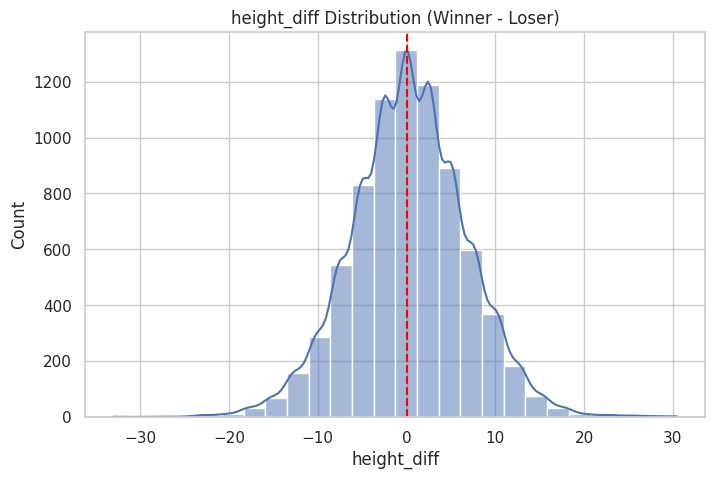

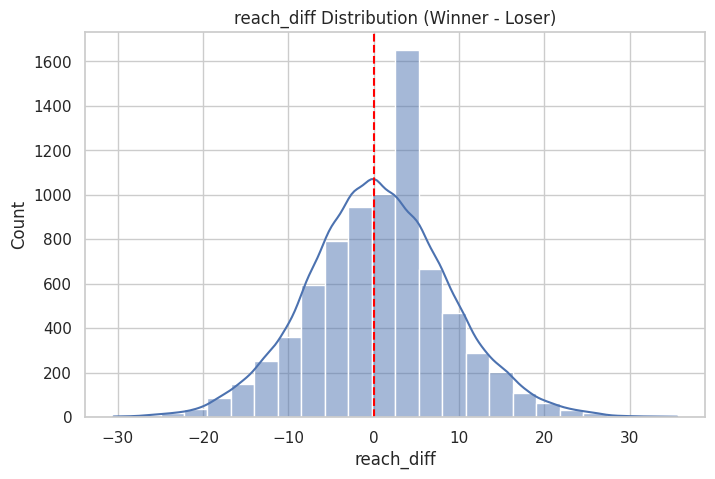

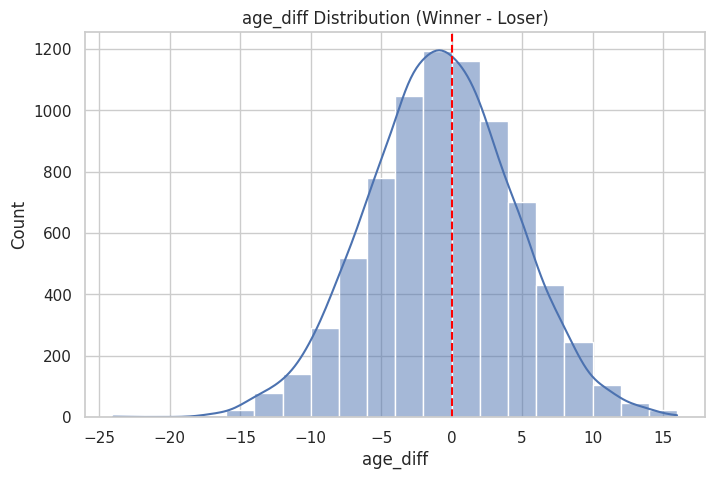

In [206]:
bin_map = {"height_diff": 26,
           "reach_diff": 24,
           "age_diff": 20}
for col in phys_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(win_df[col], kde=True, bins=bin_map[col])
    plt.axvline(0, color="red", linestyle="--")
    plt.title(f"{col} Distribution (Winner - Loser)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


##### From histplots we can see that height diff nearly do not have an influence on winning a match but
##### we can see that having taller reach and being younger have an effect on winning a match.

height_diff winner's advantage rate: 0.434


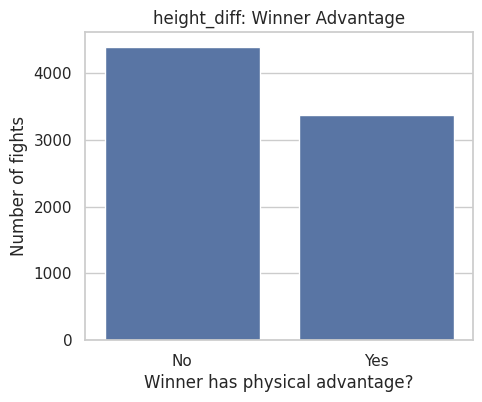

reach_diff winner's advantage rate: 0.464


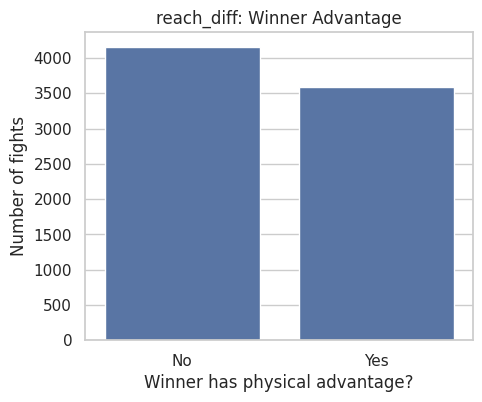

age_diff winner's advantage rate: 0.526


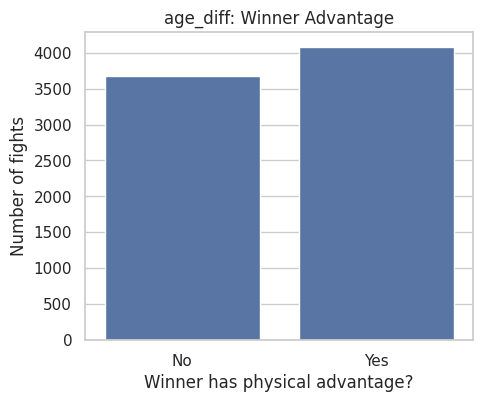

In [207]:
advantage_maps = {
    "height_diff": ("winner_taller",        lambda s: s > 0),
    "reach_diff":  ("winner_longer_reach",  lambda s: s > 0),
    "age_diff":    ("winner_younger",       lambda s: s < 0),  # younger = advantage
}

for diff_col, (flag_col, cond) in advantage_maps.items():
    # 0/1 flag: 1 => winner has a physical advantage
    win_df[flag_col] = cond(win_df[diff_col]).astype(int)
    rate = win_df[flag_col].mean()
    print(f"{diff_col} winner's advantage rate: {rate:.3f}")

    label_col = flag_col + "_label"
    win_df[label_col] = win_df[flag_col].map({0: "No", 1: "Yes"})

    plt.figure(figsize=(5, 4))
    sns.countplot(x=label_col, data=win_df, order=["No", "Yes"])
    plt.title(f"{diff_col}: Winner Advantage")
    plt.xlabel("Winner has physical advantage?")
    plt.ylabel("Number of fights")
    plt.show()


##### We can see that same height and shorter ones nearly 0.6, having same or shorter reach 0.55 and being older or same 0.48 so we cann see that having taller reach and being younger gives advantage

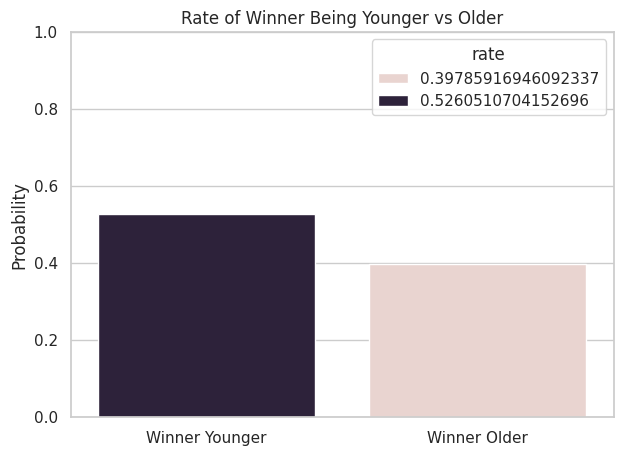

In [208]:
younger_rate = (win_df["age_diff"] < 0).mean()
older_rate   = (win_df["age_diff"] > 0).mean()

rate_df = pd.DataFrame({
    "category": ["Winner Younger", "Winner Older"],
    "rate": [younger_rate, older_rate]
})

plt.figure(figsize=(7,5))
sns.barplot(data=rate_df, x="category", y="rate", hue="rate")


plt.ylim(0, 1)
plt.ylabel("Probability")
plt.xlabel("")
plt.title("Rate of Winner Being Younger vs Older")
plt.show()


#### from this barplot we can easily see that being younger gives an advantage

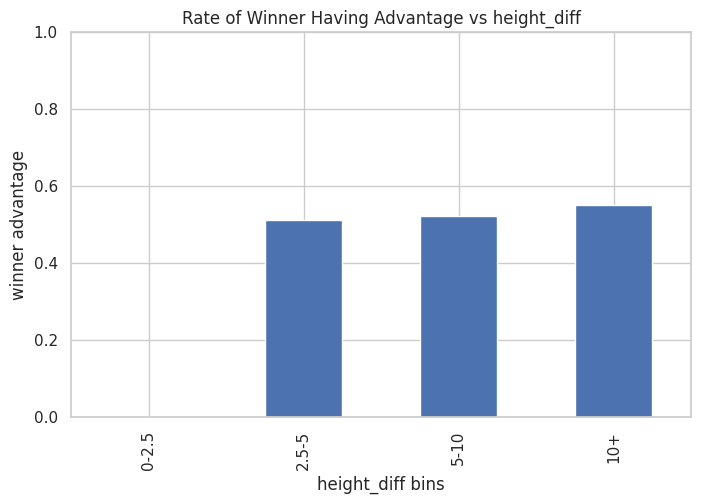

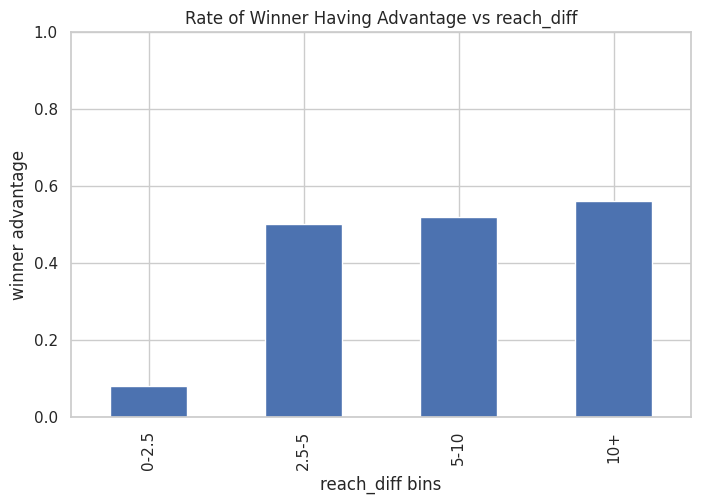

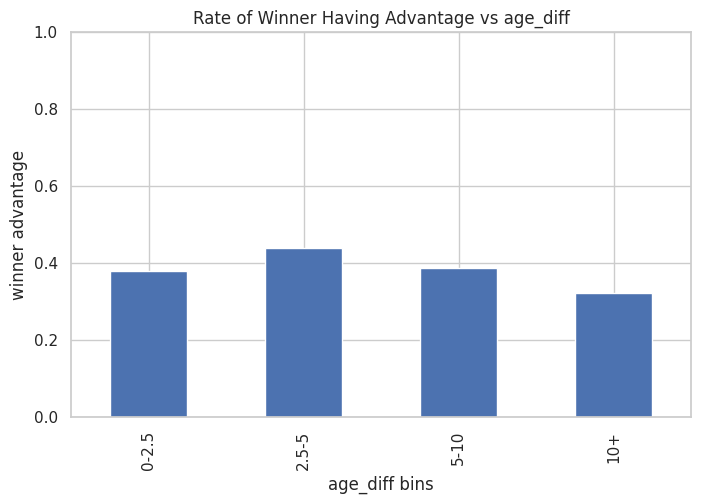

In [209]:
for col in phys_cols:
    abs_col = f"abs_{col}"
    adv_flag = f"{col}_adv"
    
    win_df[abs_col] = win_df[col].abs()
    win_df[adv_flag] = (win_df[col] > 0).astype(int)

    # bins according to difference
    bins = [0, 2.5, 5, 10, 100]  
    labels = ["0-2.5", "2.5-5", "5-10", "10+"]
    win_df[f"{col}_bin"] = pd.cut(win_df[abs_col], bins=bins, labels=labels, include_lowest=True)

    advantage_rate = win_df.groupby(f"{col}_bin", observed=False)[adv_flag].mean()

    plt.figure(figsize=(8, 5))
    advantage_rate.plot(kind="bar")
    plt.title(f"Rate of Winner Having Advantage vs {col}")
    plt.ylabel("winner advantage")
    plt.xlabel(f"{col} bins")
    plt.ylim(0, 1)
    plt.show()


##### from this barplots we can see that while height do not give any advantage (generally %50)
##### reach gives advantage after 10 and being younger gives advantage too.

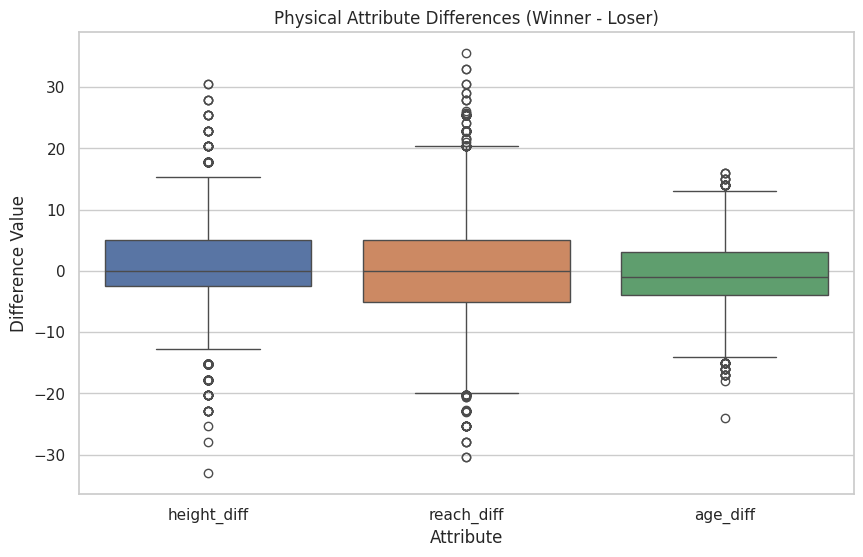

In [210]:
plt.figure(figsize=(10,6))
sns.boxplot(data=win_df[["height_diff", "reach_diff", "age_diff"]])
plt.title("Physical Attribute Differences (Winner - Loser)")
plt.xlabel("Attribute")
plt.ylabel("Difference Value")
plt.show()


##### From boxplot even though we cannot say there are big effects we can see that being younger has some effect on winning and being a taller have a little bit effect while reach do not have. But this is not directly a conclusion.

In [211]:
summary = pd.DataFrame({
    "winner_taller_rate": [(win_df["height_diff"] > 0).mean()],
    "winner_longer_reach_rate": [(win_df["reach_diff"] > 0).mean()],
    "winner_younger_rate": [(win_df["age_diff"] < 0).mean()],
})

summary

,winner_taller_rate,winner_longer_reach_rate,winner_younger_rate
0,0.434227,0.463632,0.526051


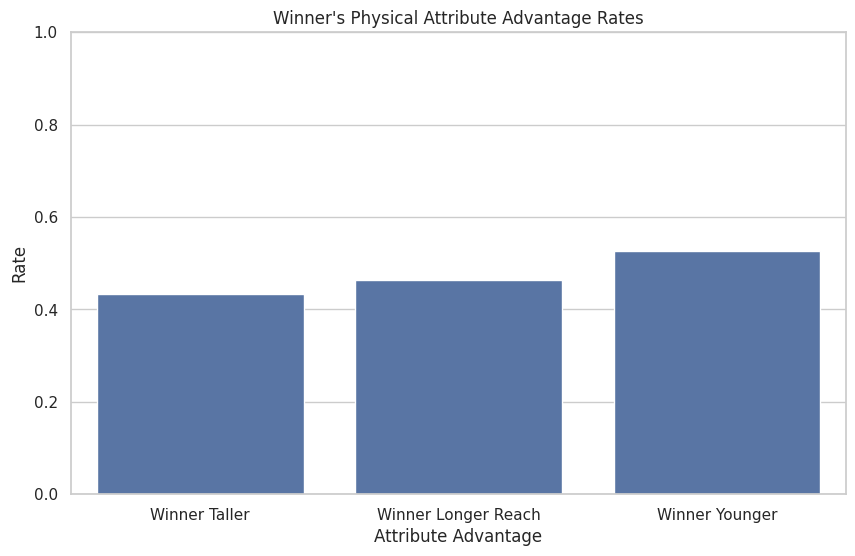

In [212]:
summary_melted = summary.T.reset_index()
summary_melted.columns = ["attribute", "rate"]

label_map = {
    "winner_taller_rate": "Winner Taller",
    "winner_longer_reach_rate": "Winner Longer Reach",
    "winner_younger_rate": "Winner Younger",
}
summary_melted["attribute"] = summary_melted["attribute"].map(label_map)

plt.figure(figsize=(10, 6))
sns.barplot(data=summary_melted, x="attribute", y="rate")

plt.ylim(0, 1)
plt.ylabel("Rate")
plt.xlabel("Attribute Advantage")
plt.title("Winner's Physical Attribute Advantage Rates")
plt.xticks()
plt.show()

#### from this barplot we can see that being youn can effect because winner is same age or older is 0.48 but younger is 0.52

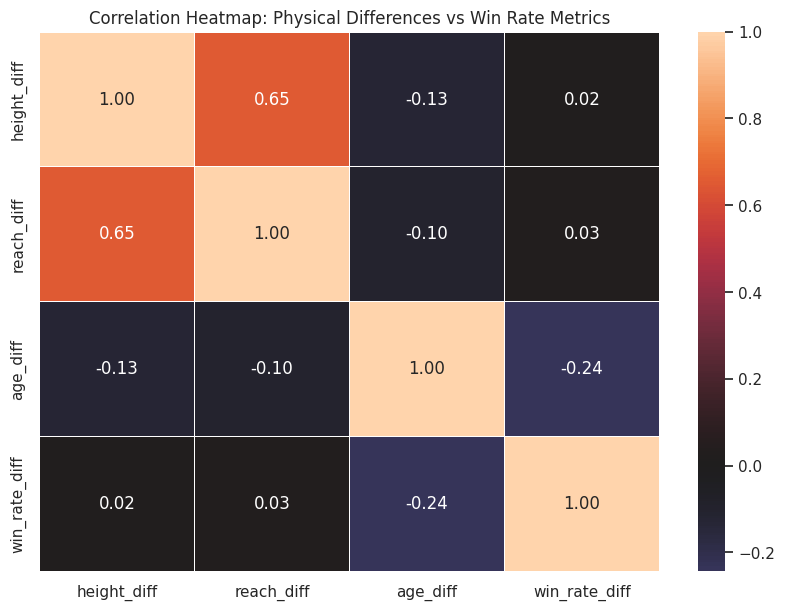

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["height_diff", "reach_diff", "age_diff", "win_rate_diff"]

existing_cols = [c for c in cols if c in win_df.columns]

corr = win_df[existing_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, center=0, linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap: Physical Differences vs Win Rate Metrics")
plt.show()


##### from this heatmap we can see the correlation of physical attributes and winning rates
##### and we can see that height and reach diff do not have correlation but being younger is have a correlation with winning.

## Conclusion
#### We can see that from all the graphs, being taller do not has effect on winning the match BUT
#### while having taller reach have a little effect on winning,
#### being younger is having effect on winning.
### So that we can say that out hypotesis is true for being younger and having taller reach but not for being taller.

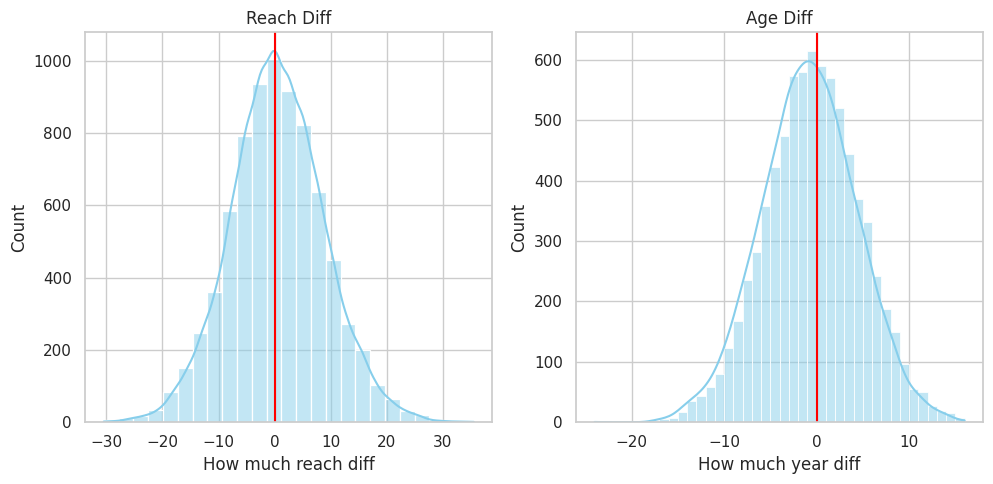

T TEST

reach_diff Analysing
mean diff: 0.5541
P value: 4.2480e-09
While reach_diff increasing, possibility of winning increasing too.

age_diff Analysing
mean diff: -0.8371
P value: 2.6070e-45
While age_diff decreasing, possibility of winning decreasing too.

height_diff Analysing
mean diff: 0.3001
P value: 4.7657e-05
While height_diff increasing, possibility of winning increasing too.


In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


win_df = df[df['Win/No Contest/Draw'] == 'win'].copy()

features = ['reach_diff', 'age_diff', 'height_diff']
win_df = win_df.dropna(subset=features)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(win_df['reach_diff'], kde=True, color="skyblue", bins=25)
plt.axvline(0, color='red')
plt.title("Reach Diff")
plt.xlabel("How much reach diff")

plt.subplot(1, 3, 2)
sns.histplot(win_df['age_diff'], kde=True, color="skyblue", bins=40)
plt.axvline(0, color='red')
plt.title("Age Diff")
plt.xlabel("How much year diff")

plt.tight_layout()
plt.show()

print("T TEST")

for col in features:
    t_stat, p_val = stats.ttest_1samp(win_df[col], 0)
    mean_val = win_df[col].mean()
    print()
    print(f"{col} Analysing")
    print(f"mean diff: {mean_val:.4f}")
    print(f"P value: {p_val:.4e}")
    
    if p_val < 0.05:
        if mean_val > 0:
            print(f"While {col} increasing, possibility of winning increasing too.")
        else:
            print(f"While {col} decreasing, possibility of winning decreasing too.")
    else:
        print("There is no significant effect")

